<a href="https://colab.research.google.com/github/yvig/nsi/blob/master/pb_tri_insertion_tri_fusion.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Temps d'exécution du tri par insertion et du tri fusion

Le code suivant me donne un résultat inverse de ce que je pensais...
Tri insertion en $O(n^2)$ et fusion en $O(n \text{log}(n))$  
Le tri fusion semble bien plus lent...

In [ ]:
def fusion(l1,l2):
    """
    Précondition : l1 et l2 sont deux listes triées
    Postcondition : la fonction renvoie une liste triée constituée de la fusion 
    de l1 et l2
    Exemple :
    fusion([2, 3, 5, 8],[1, 4]) renvoie [1, 2, 3, 5, 8]
    """
    n1 = len(l1)
    n2 = len(l2)
    lst = [] # initialisation de la fusion de l1 et l2 
    i1 = 0 # indice qui sert à parcourir l1
    i2 = 0 # indice qui sert à parcourir l2
    while i1 < n1 and i2 < n2 :
        if l1[i1] < l2[i2]:
            lst.append(l1[i1])
            i1 = i1 + 1
        else :
            lst.append(l2[i2])
            i2 = i2 + 1
    if i1 == n1:
        return lst + l2[i2:]
    if i2 == n2:
        return lst + l1[i1:]

fusion([2, 3, 5, 8],[1, 4])   



[1, 2, 3, 4, 5, 8]

In [ ]:
def triFusion(lst):
    """
    Précondition : lst est une liste
    Postcondition : la fonction renvoie une liste qui est la liste triée

    """
    n = len(lst)
    if n <= 1:
        return lst
    else :
        m = n//2
        return fusion(triFusion(lst[:m]), triFusion(lst[m:])) 

tab = [4, 3, 8, 2, 7, 1, 5]

print(triFusion(tab))
print(tab)

[1, 2, 3, 4, 5, 7, 8]
[4, 3, 8, 2, 7, 1, 5]


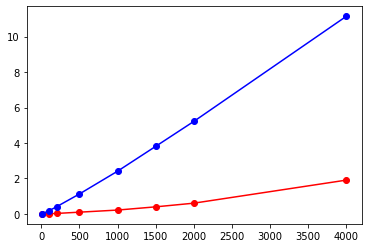

In [ ]:
import timeit
import matplotlib.pyplot as plt
from random import shuffle

def tri_insertion(tab:list)->list:
    """
    tab est de type liste
    La fonction renvoie la liste triée par ordre croissant.
    Elle utilise l'algorithme de tri par insertion. C'est un tri en place.
    """
    for indice in range(len(tab)):
        element = tab[indice]
        i = indice
        while i>0 and tab[i-1] > element:
            tab[i] = tab[i-1]
            i = i-1
        tab[i] = element
    return tab


# différentes tailles de listes
abscisse = [10, 100, 200, 500, 1000, 1500, 2000, 4000]

ordonnee_insertion = [] # liste des temps par tri insertion
ordonnee_fusion = [] # liste des temps par tri fusion

# Création des listes non triées de tailles n
for n in abscisse:
    l = [n-i for i in range(n)] # création de la liste de taille n : [n ... 1]
    # triée en ordre inverse : pire des cas pour le tri par insertion

    # Création des listes d'ordonnées correspondantes pour chaque graphique
    # Pour  le tri par insertion :
    temps=timeit.timeit("tri_insertion(l)", number=1000, globals=globals())
    ordonnee_insertion.append(temps)

    # Par tri fusion
    # Attention, l a été triee par la fonction tri_insertion
    shuffle(l) # mélange de cette liste
    temps=timeit.timeit("triFusion(l)", number=1000, globals=globals())
    ordonnee_fusion.append(temps)

# Graphique pour le tri insertion en rouge
plt.plot(abscisse, ordonnee_insertion, "ro-") # en rouge

# Graphique pour le tri fusion en bleu
plt.plot(abscisse, ordonnee_fusion, "bo-") # en bleu

plt.show()
plt.close()

Je me suis dit que cela venait peut-être des slices.  
Version de M. CHENO sans slices

In [ ]:
def partage(L):
    '''prend une liste L et renvoie un couple de deux listes de taille identique (à l'unité près)
    de sorte que leur réunion soit la liste L de départ'''
    n = len(L)
    if n < 2:
        return L, []
    else:
        p = n // 2
        q = n - p
        L1, L2 = [0] * q, [0] * p
        for i in range(n):
            if i < q:
                L1[i] = L[i]
            else:
                L2[i - q] = L[i]
        return L1, L2


def fusion(L1, L2):
    '''réalise la fusion de deux listes triées, le résultat est une liste triée'''
    n1, n2 = len(L1), len(L2)
    n = n1 + n2
    L = [0] * n
    i, i1, i2 = 0, 0, 0
    while i1 < n1 and i2 < n2:
        if L1[i1] < L2[i2]:
            L[i] = L1[i1]
            i1 += 1
        else:
            L[i] = L2[i2]
            i2 += 1
        i += 1
    # ici on a vidé l'une ou l'autre des deux listes
    # s'il faut encore vider L1
    while i1 < n1:
        L[i] = L1[i1]
        i1 += 1
        i += 1
    # s'il faut encore vider L2
    while i2 < n2:
        L[i] = L2[i2]
        i2 += 1
        i += 1
    return L

def tri(L):
    if len(L) < 2:
        return L
    else:
        L1, L2 = partage(L)
        return fusion(tri(L1), tri(L2))

tab = [4, 3, 8, 2, 7, 1, 5]
print(tri(tab))
print(tab)



[1, 2, 3, 4, 5, 7, 8]
[4, 3, 8, 2, 7, 1, 5]


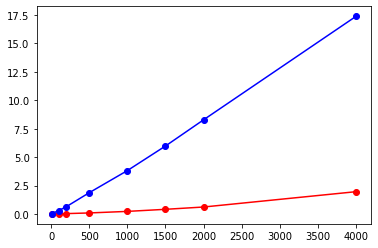

In [ ]:
import timeit
import matplotlib.pyplot as plt
from random import shuffle

def tri_insertion(tab:list)->list:
    """
    tab est de type liste
    La fonction renvoie la liste triée par ordre croissant.
    Elle utilise l'algorithme de tri par insertion. C'est un tri en place.
    """
    for indice in range(len(tab)):
        element = tab[indice]
        i = indice
        while i>0 and tab[i-1] > element:
            tab[i] = tab[i-1]
            i = i-1
        tab[i] = element
    return tab


# différentes tailles de listes
abscisse = [10, 100, 200, 500, 1000, 1500, 2000, 4000]

ordonnee_insertion = [] # liste des temps par tri insertion
ordonnee_fusion = [] # liste des temps par tri fusion

# Création des listes non triées de tailles n
for n in abscisse:
    l = [n-i for i in range(n)] # création de la liste de taille n : [n... 1]
    # triée en ordre inverse : pire des cas pour le tri par insertion

    # Création des listes d'ordonnées correspondantes pour chaque graphique
    # Pour  le tri par insertion :
    temps=timeit.timeit("tri_insertion(l)", number=1000, globals=globals())
    ordonnee_insertion.append(temps)

    # Par tri fusion de M. CHENO
    # Attention, l a été triee par la fonction tri_insertion
    shuffle(l) # mélange de cette liste
    temps=timeit.timeit("tri(l)", number=1000, globals=globals())
    ordonnee_fusion.append(temps)

# Graphique pour le tri insertion en rouge
plt.plot(abscisse, ordonnee_insertion, "ro-") # en rouge

# Graphique pour le tri fusion en bleu
plt.plot(abscisse, ordonnee_fusion, "bo-") # en bleu

plt.show()
plt.close()

# 😥 Conclusion : C'est encore pire!

Mireille Coilhac